In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-vital-signs/Human_vital_signs_R.csv


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/kaggle/input/human-vital-signs/Human_vital_signs_R.csv")

In [4]:
df

,Unnamed: 0,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,0,94.0,21.0,97.0,36.2,Normal
1,1,1,94.0,25.0,97.0,36.2,Normal
2,2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...,...
25488,476,476,56.0,12.0,101.0,33.0,Abnormal
25489,477,477,94.0,25.0,98.0,36.4,Normal
25490,478,478,94.0,21.0,97.0,36.2,Normal
25491,479,479,93.0,27.0,95.0,37.0,Normal


In [5]:
df['Unnamed: 0'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
print(df.shape)
print(df.isnull().values.any())

(25493, 7)
True


In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df

,Unnamed: 0,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,0,94.0,21.0,97.0,36.2,Normal
1,1,1,94.0,25.0,97.0,36.2,Normal
2,2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...,...
25488,476,476,56.0,12.0,101.0,33.0,Abnormal
25489,477,477,94.0,25.0,98.0,36.4,Normal
25490,478,478,94.0,21.0,97.0,36.2,Normal
25491,479,479,93.0,27.0,95.0,37.0,Normal


In [9]:
df['OUTPUT'] = df['OUTPUT'].str.strip().str.lower().replace({'normal': 0, 'abnormal': 1})

In [10]:
df

,Unnamed: 0,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,0,94.0,21.0,97.0,36.2,0
1,1,1,94.0,25.0,97.0,36.2,0
2,2,2,101.0,25.0,93.0,38.0,1
3,3,3,55.0,11.0,100.0,35.0,1
4,4,4,93.0,26.0,95.0,37.0,0
...,...,...,...,...,...,...,...
25488,476,476,56.0,12.0,101.0,33.0,1
25489,477,477,94.0,25.0,98.0,36.4,0
25490,478,478,94.0,21.0,97.0,36.2,0
25491,479,479,93.0,27.0,95.0,37.0,0


In [11]:
column_names = df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['Unnamed: 0', 'Time (s)', ' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)', 'OUTPUT']


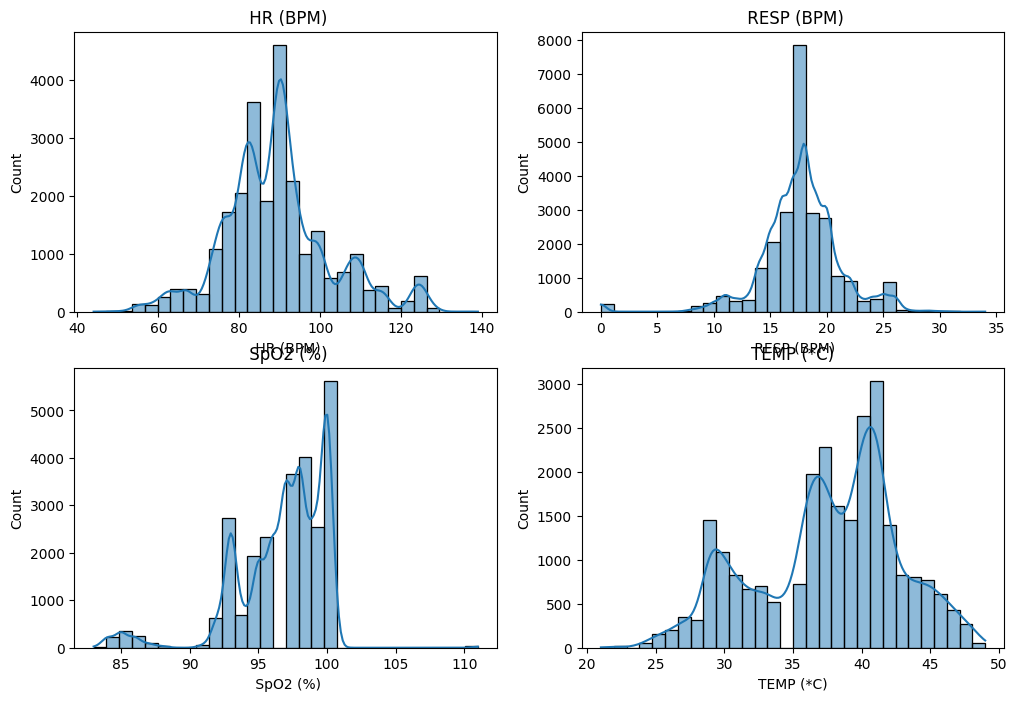

In [12]:
# Plot histograms for selected vital signs
plt.figure(figsize=(12, 8))
for i, column in enumerate([' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)

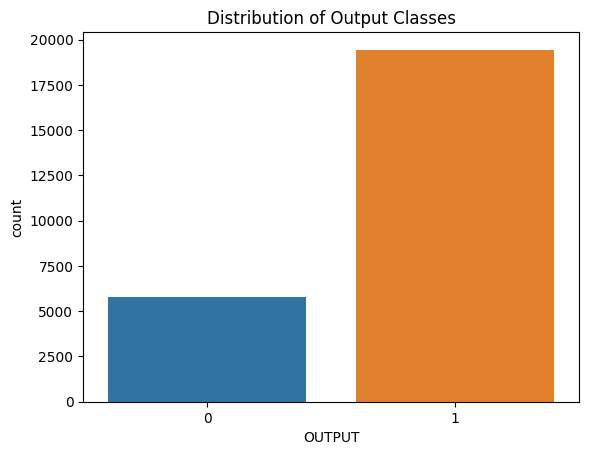

In [13]:
# Plot a count plot for the distribution of output classes
plt.figure()
sns.countplot(x='OUTPUT', data=df)
plt.title("Distribution of Output Classes")
plt.show()

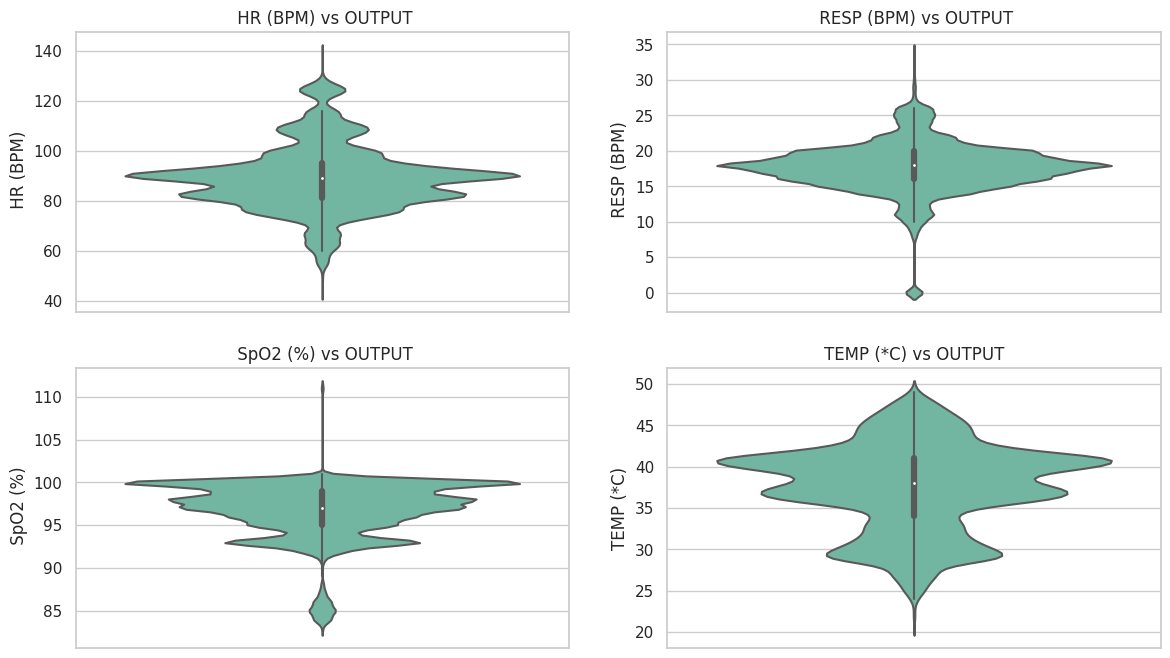

In [14]:
# Set seaborn style and plot violin plots for vital signs vs. output classes
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
for i, vital_sign in enumerate([' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(y=vital_sign, data=df, palette="Set2")
    plt.title(f'{vital_sign} vs OUTPUT')
    plt.ylabel(vital_sign)

In [15]:
# unnamed and time not needed, so removing

df.drop(columns=['Unnamed: 0', 'Time (s)'],inplace=True)

In [16]:
df

,HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,94.0,21.0,97.0,36.2,0
1,94.0,25.0,97.0,36.2,0
2,101.0,25.0,93.0,38.0,1
3,55.0,11.0,100.0,35.0,1
4,93.0,26.0,95.0,37.0,0
...,...,...,...,...,...
25488,56.0,12.0,101.0,33.0,1
25489,94.0,25.0,98.0,36.4,0
25490,94.0,21.0,97.0,36.2,0
25491,93.0,27.0,95.0,37.0,0


## Model Training

we will be using emsemble learning to train the data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping



In [18]:
#preparing the dataset 
X = df.iloc[:,:-1]
Y = df['OUTPUT']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=69)

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.98
ROC-AUC: 0.97


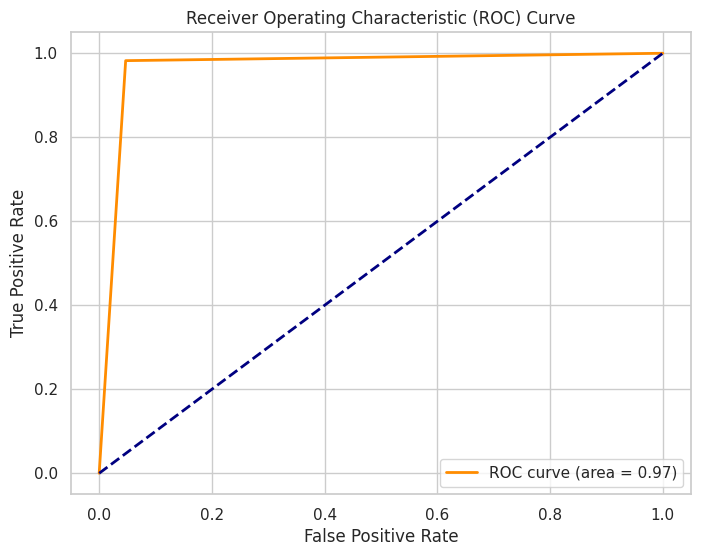

In [19]:
# Logistic Regression

lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_lr:.2f}')

# Calculate precision
precision_lr = precision_score(y_test, y_pred)
print(f'Precision: {precision_lr:.2f}')

# Calculate recall
recall_lr = recall_score(y_test, y_pred)
print(f'Recall: {recall_lr:.2f}')

# Calculate F1 score
f1_lr = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_lr:.2f}')

# Calculate ROC-AUC
roc_auc_lr = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc_lr:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.96


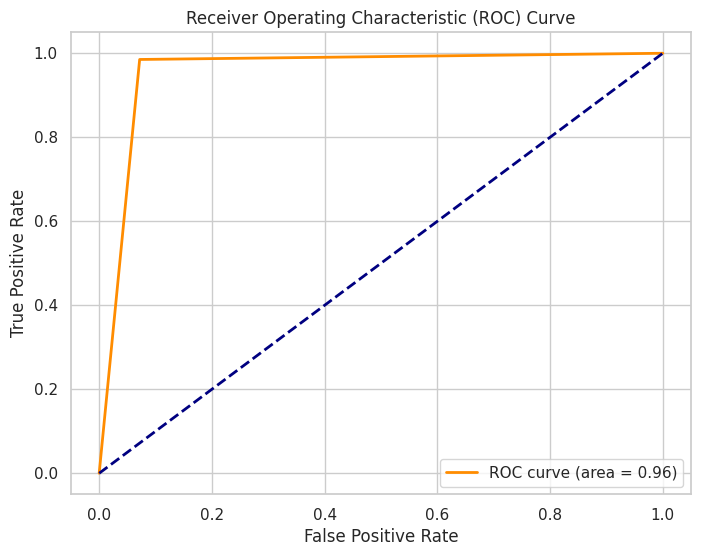

In [20]:
#naive bayes

gnb = GaussianNB()

gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

accuracy_gnb = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_gnb:.2f}')

# Calculate precision
precision_gnb = precision_score(y_test, y_pred)
print(f'Precision: {precision_gnb:.2f}')

# Calculate recall
recall_gnb = recall_score(y_test, y_pred)
print(f'Recall: {recall_gnb:.2f}')

# Calculate F1 score
f1_gnb = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_gnb:.2f}')

# Calculate ROC-AUC
roc_auc_gnb = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc_gnb:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gnb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00


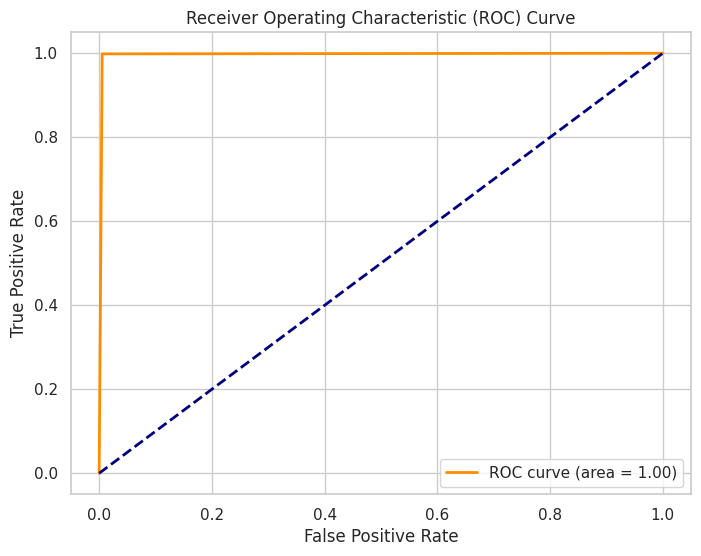

In [21]:
#decision tree

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_dt:.2f}')

# Calculate precision
precision_dt = precision_score(y_test, y_pred)
print(f'Precision: {precision_dt:.2f}')

# Calculate recall
recall_dt = recall_score(y_test, y_pred)
print(f'Recall: {recall_dt:.2f}')

# Calculate F1 score
f1_dt = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_dt:.2f}')

# Calculate ROC-AUC
roc_auc_dt = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc_dt:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00


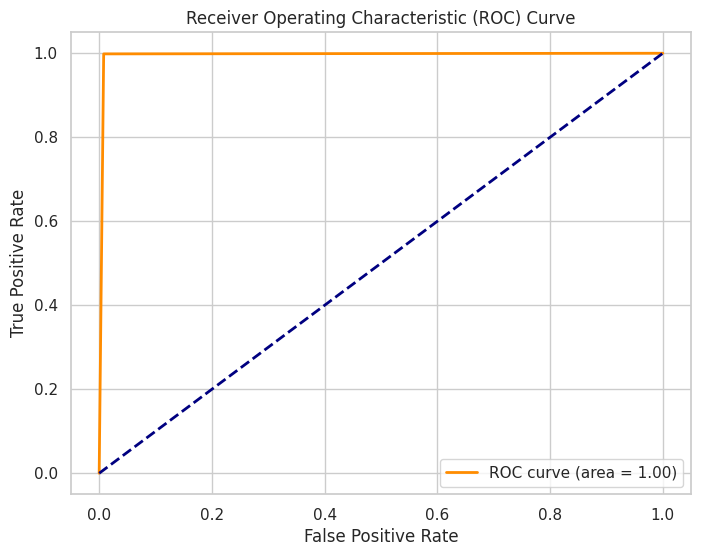

In [22]:
#rnadom forest

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf:.2f}')

# Calculate precision
precision_rf = precision_score(y_test, y_pred)
print(f'Precision: {precision_rf:.2f}')

# Calculate recall
recall_rf = recall_score(y_test, y_pred)
print(f'Recall: {recall_rf:.2f}')

# Calculate F1 score
f1_rf = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_rf:.2f}')

# Calculate ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc_rf:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [24]:
import joblib
model_filename = 'random_forest_model.pkl'
joblib.dump(rf, model_filename)
print(f'Model saved to {model_filename}')

Model saved to random_forest_model.pkl


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
2018/2018 [==============================] - 6s 2ms/step - loss: 0.1796 - accuracy: 0.9406 - val_loss: 0.0809 - val_accuracy: 0.9726
Epoch 2/3
2018/2018 [==============================] - 5s 2ms/step - loss: 0.0941 - accuracy: 0.9656 - val_loss: 0.0794 - val_accuracy: 0.9655
Epoc

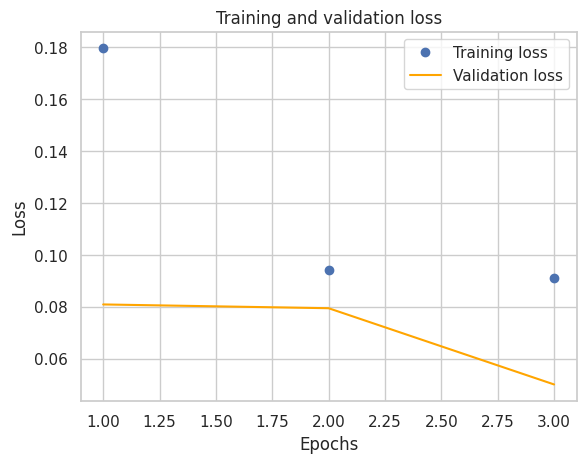

In [25]:
#neural net

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=3, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#voting classification

estimator = [] 
estimator.append(('LR',lr)) 
estimator.append(('GNB',gnb)) 
estimator.append(('DT', dt))
estimator.append(('RF', rf))
  
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(x_train, y_train) 
y_pred = vot_hard.predict(x_test) 

accuracy_vote = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_vote:.2f}')

# Calculate precision
precision_vote = precision_score(y_test, y_pred)
print(f'Precision: {precision_vote:.2f}')

# Calculate recall
recall_vote = recall_score(y_test, y_pred)
print(f'Recall: {recall_vote:.2f}')

# Calculate F1 score
f1_vote = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_vote:.2f}')

# Calculate ROC-AUC
roc_auc_vote = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc_vote:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_vote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()